# A/B Testing for Data Science using Python: Check Which Newsletter Brings Higher Traffic

## Overview
- A/B testing is a popular way to test your products and is gaining steam in the data science field
- Here, we’ll understand what A/B testing is and how you can leverage A/B testing in data science using Python

**Picture this scenario** – You have made certain changes to your website recently. Unfortunately, you have no way of knowing with full accuracy how the next 100,000 people who visit your website will behave. That is the information we cannot know today, and if we were to wait until those 100,000 people visited our site, it would be too late to optimize their experience.

This is where a data scientist can take control. A data scientist collects and studies the data available to help optimize the website for a better consumer experience. And for this, it is imperative to know how to use various statistical tools, especially the concept of A/B Testing.

## What is A/B testing?

In the above scenario, you may divide the products into two parts – A and B. Here A will remain unchanged while you make significant changes in B’s packaging. Now, on the basis of the response from customer groups who used A and B respectively, you try to decide which is performing better.

## How does A/B Testing Work?

Let’s say there is an e-commerce company XYZ. It wants to make some changes in its newsletter format to increase the traffic on its website. It takes the original newsletter and marks it A and makes some changes in the language of A and calls it B. Both newsletters are otherwise the same in color, headlines, and format.

<img src="img/newsletterimage.png">

### Objective
Our objective here is to check which newsletter brings higher traffic on the website i.e the conversion rate. We will use A/B testing and collect data to analyze which newsletter performs better.

## Make a Hypothesis

In hypothesis testing, we have to make two hypotheses i.e Null hypothesis and the alternative hypothesis. Let’s have a look at both.

- **Null hypothesis or $H_0$**:
The null hypothesis is the one that states that sample observations result purely from chance. From an A/B test perspective, the null hypothesis states that there is no difference between the control and variant groups. It states the default position to be tested or the situation as it is now, i.e. the status quo. Here our H0 is ” there is no difference in the conversion rate in customers receiving newsletter A and B”.

- **Alternative Hypothesis or $H_a$**:
The alternative hypothesis challenges the null hypothesis and is basically a hypothesis that the researcher believes to be true. The alternative hypothesis is what you might hope that your A/B test will prove to be true.

In our example, the $H_a$ is- **“the conversion rate of newsletter B is higher than those who receive newsletter A“.**

Now, we have to collect enough evidence through our tests to **reject the null hypothesis.**

## Create Control Group and Test Group

The Control Group is the one that will receive newsletter A and the Test Group is the one that will receive newsletter B.

For this experiment, we randomly sample 1000 customers – 500 each for our Control group and Test group. **Note**: Random sampling is important in hypothesis testing because it eliminates sampling bias, and **it’s important to eliminate bias because you want the results of your A/B test to be representative of the entire population rather than the sample itself.**

It is required that we determine the minimum sample size for our A/B test before conducting it so that we can eliminate **under coverage bias**. It is the bias from sampling too few observations.

## Conduct the A/B Test and Collect the Data

When we run our experiment for one month, we noticed that the mean conversion rate for the Control group is 16% whereas that for the test Group is 19%.

# Statistical significance of the Test

Now, the main question is – Can we conclude from here that the Test group is working better than the control group?

The answer to this is a simple No! For rejecting our null hypothesis we have to prove the Statistical significance of our test.

There are two types of errors that may occur in our hypothesis testing:

1. Type I error: We reject the null hypothesis when it is true. That is we accept the variant B when it is not performing better than A
2. Type II error: We failed to reject the null hypothesis when it is false. It means we conclude variant B is not good when it performs better than A.

That means the difference between your control version and the test version is not due to some error or random chance. To prove the statistical significance of our experiment we can use a **two-sample T-test**.

<img src="img/p-value.png">

To understand this, we must be familiar with a few terms:

1. **Significance level $(\alpha)$**: The significance level, also denoted as $\alpha, is the probability of rejecting the null hypothesis when it is true. Generally, we use the significance value of 0.05
2. **P-Value**: It is the probability that the difference between the two values is just because of random chance. P-value is evidence against the null hypothesis. The smaller the p-value the stronger the chances to reject the $H_0$. For the significance level of 0.05, if the p-value is lesser than it hence we can reject the null hypothesis.
3. **Confidence interval**: The confidence interval is an observed range in which a given percentage of test outcomes fall. We manually select our desired confidence level at the beginning of our test. Generally, we take a 95% confidence interval

Next, we can calculate our t statistics using the below formula:

$$
T_{statistic} = \frac{value_{observed} - value_{hypothesized}}{error_{standard}}
$$
where
$$
error_{standard} = \sqrt{\frac{2*Variance(sample)}{N}}
$$


## Let’s Implement the Significance Test in Python

   Day   Conversion_A  Conversion_B
0     1          0.15          0.19
1     2          0.12          0.20
2     3          0.18          0.18
3     4          0.19          0.22
4     5          0.17          0.19


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


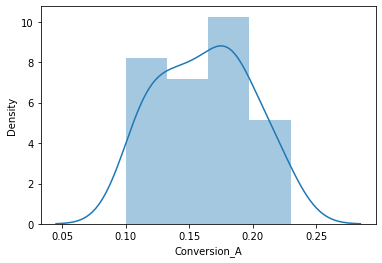

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as ss 
import matplotlib.pyplot as plt


data= pd.read_csv("data.csv")
print(data.head())

# Let’s plot the distribution of target and control group:

sns.distplot(data.Conversion_A)
plt.show()

In [2]:
# At last, we will perform the t-test:

t_stat, p_val= ss.ttest_ind(data.Conversion_B,data.Conversion_A)
t_stat , p_val

(3.78736793091929, 0.000363796012828762)

For our example, the observed value i.e the **mean of the test group is 0.19**. The **hypothesized value (Mean of the control group) is 0.16**. On the calculation of the t-score, we get the **t-score as .3787** and the **p-value is 0.00036**.

Here, our p-value is less than the significance level i.e 0.05. Hence, we can reject the null hypothesis. This means that in our A/B testing, newsletter B is performing better than newsletter A. 

So our recommendation would be to replace our current newsletter with B to bring more traffic on our website.

## What Mistakes Should we Avoid While Conducting A/B Testing?

There are a few key mistakes I’ve seen data science professionals making. Let me clarify them for you here:

- **Invalid hypothesis**: The whole experiment depends on one thing i.e the hypothesis. What should be changed? Why should it be changed, what the expected outcome is, and so on? If you start with the wrong hypothesis, the probability of the test succeeding, decreases 
- **Testing too Many Elements Together**: Industry experts caution against running too many tests at the same time. Testing too many elements together makes it difficult to pinpoint which element influenced the success or failure. Thus, prioritization of tests is indispensable for successful A/B testing

- **Ignoring Statistical Significance**: It doesn’t matter what you feel about the test. Irrespective of everything, whether the test succeeds or fails, allow it to run through its entire course so that it reaches its statistical significance

- **Not considering the external factor**: Tests should be run in comparable periods to produce meaningful results. For example, it is unfair to compare website traffic on the days when it gets the highest traffic to the days when it witnesses the lowest traffic because of external factors such as sale or holidays

## When Should We Use A/B Testing?
A/B testing works best when testing incremental changes, such as UX changes, new features, ranking, and page load times. Here you may compare pre and post-modification results to decide whether the changes are working as desired or not.

A/B testing doesn’t work well when testing major changes, like new products, new branding, or completely new user experiences. In these cases, there may be effects that drive higher than normal engagement or emotional responses that may cause users to behave in a different manner.